In [1]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

In [2]:
df=pd.read_csv("E:/piere/Documentos/Portafolio/fraud/Data/processed/fraud_final.csv")

In [3]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0


In [4]:
df["step"]=df["step"].map(lambda x: ceil(x/24))

In [5]:
df.tail(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2770406,31,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
2770407,31,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
2770408,31,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [6]:
column=list(set(list(df.columns))-set(list(["type", "nameOrig", "nameDest","isFraud"])))

In [7]:
X=df[column]
y=df["isFraud"]

In [8]:
pt=PowerTransformer()
X=pt.fit_transform(X)

In [9]:
def report(y_true,y_pred):
    print(classification_report(y_true,y_pred))
def matrix(y_true,y_pred):
    g=confusion_matrix(y_true,y_pred)
    sns.heatmap(data=g,cbar=False,annot=True,cmap="Blues",fmt="g",linewidths=.5,linecolor="black")
    plt.title("Matriz de confusión")
    plt.show()
    

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.3)


In [11]:
cfl1=DecisionTreeClassifier(random_state=0)
cfl1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
y_predict=cfl1.predict(X_test)

In [13]:
report(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.87      0.85      0.86      2496

    accuracy                           1.00    831123
   macro avg       0.94      0.93      0.93    831123
weighted avg       1.00      1.00      1.00    831123



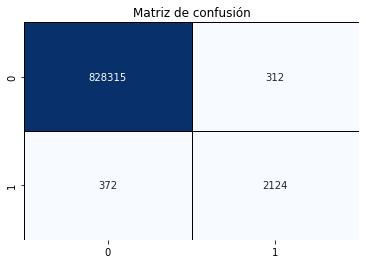

In [14]:
matrix(y_test, y_predict)


In [15]:
for name, score in zip(column, cfl1.feature_importances_):
    print("{:<20}  {:<20}".format(name,score))

oldbalanceDest        0.1681724857657636  
newbalanceDest        0.08926283834663168 
step                  0.0970915381988052  
newbalanceOrig        0.04412800454469314 
oldbalanceOrg         0.3048619783896337  
amount                0.2964831547544727  


In [16]:
cfl2=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4)
cfl2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=42)

In [17]:
y_predict=cfl2.predict(X_test)

In [18]:
report(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       1.00      0.47      0.64      2496

    accuracy                           1.00    831123
   macro avg       1.00      0.74      0.82    831123
weighted avg       1.00      1.00      1.00    831123



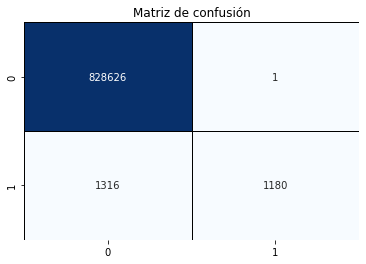

In [19]:
matrix(y_test, y_predict)

In [20]:
for name, score in zip(column, cfl2.feature_importances_):
    print("{:<20}  {:<20}".format(name,score))

oldbalanceDest        0.1317841125516526  
newbalanceDest        0.22892434854990326 
step                  0.1442322418724898  
newbalanceOrig        0.07676470006398717 
oldbalanceOrg         0.3077633488272226  
amount                0.11053124813474458 


In [21]:
cfl3=AdaBoostClassifier(random_state=0)
cfl3.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [22]:
y_predict=cfl3.predict(X_test)
report(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      0.61      0.74      2496

    accuracy                           1.00    831123
   macro avg       0.96      0.81      0.87    831123
weighted avg       1.00      1.00      1.00    831123



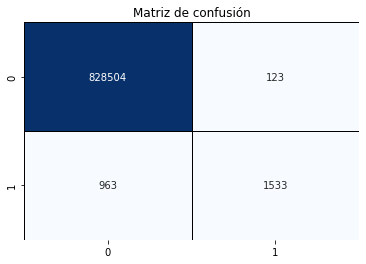

In [23]:
matrix(y_test, y_predict)

In [24]:
for name, score in zip(column, cfl3.feature_importances_):
    print("{:<20}  {:<20}".format(name,score))

oldbalanceDest        0.08                
newbalanceDest        0.22                
step                  0.14                
newbalanceOrig        0.06                
oldbalanceOrg         0.26                
amount                0.24                


# conclusión 

Como anticipamos, nuestra data muestra un fuerte desbalance dentro de las etiquetas. Por este motivo, realizaré un under-balance a razón de la cantidad de registros que resultarían sería  inmanejable para mi computador. Además, en el anterior proyecto realizamos un sobre balance para equilibrar etiquetas.

Escogeremos el moelo que mejor se comporto en mi data para asi simplficar los tiuempos de ejecución



In [25]:
df_false=df[df["isFraud"]==False]
df_true=df[df["isFraud"]==True]

In [26]:
df_true.shape[0]

8213

In [27]:
df_false=df_false.sample(n=df_true.shape[0], replace=False, random_state=42)

In [28]:
df_false.shape

(8213, 10)

In [29]:
df_final=pd.concat([df_false, df_true], ignore_index=True)

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.3+ MB


Observamos que ya hemos under balanceado mi datos, procegimos a observar los resultados con este nuevo data set.

In [31]:
df_final=df_final.sample(frac=1, random_state=42).reset_index()

In [46]:
X_final=df_final[column]
y_final=df_final["isFraud"]

In [33]:
X_final=pt.fit_transform(X_final)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=.3, random_state=42)

In [35]:
cfl_final=DecisionTreeClassifier()
cfl_final.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_final=cfl_final.predict(X_test)

In [37]:
report(y_true=y_test, y_pred=y_pred_final)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2484
           1       0.98      0.98      0.98      2444

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



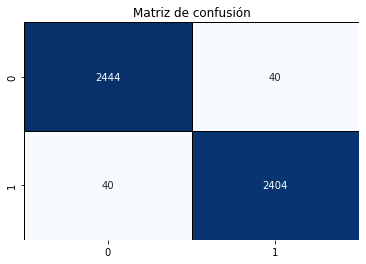

In [38]:
matrix(y_true=y_test, y_pred=y_pred_final)

In [39]:
for name, score in zip(column, cfl_final.feature_importances_):
    print("{:>20}  {:<20}".format(name, score))

      oldbalanceDest  0.004132261892269971
      newbalanceDest  0.1341830362474479  
                step  0.011833348430605793
      newbalanceOrig  0.10683544765082229 
       oldbalanceOrg  0.5716739776312081  
              amount  0.17134192814764596 


# Conclusión 
*  Indudablemente, hemos mejorado nuestro modelo. Sin embargo, buscaremos mejorar mis estadísticas realizando una Red neuronal con estos datos. Cabe aclarar, nuevamente, que me enfocaré en los datos del under-sample por motivos de hardware disponible para este proyecto.
* Quiero mencionar que los resultados muestran una fuerte tendencia de variables como el balance original, cabe mencionar que recomendaciones para futuros modelos, se puede explorar la idea de enriquecer mi base de datos, donde busque nuevas variables numéricas y convertir categóricas a numéricas.

In [49]:
df_final.to_csv("E:/piere/Documentos/Portafolio/fraud/Data/processed/data_final.csv", index=False)